[     0.           1209.32514217 -23645.00982348   9223.68217825
   4088.94425945]
-2458398.7200785037
MAE 24131.658311637955
MSE 860689141.0366676
RMSE 29337.504001476806
Mediane 23535.552231864305
R2 0.8306470454343272
cross_val_score [0.40840673 0.44802571 0.57618648 0.83121088 0.80756245]

Meilleure Score 0.6142784508405569
Meilleur parametres {'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


(array([2., 4., 3., 1., 4., 1., 1., 2., 0., 2.]),
 array([  394.72236212,  6297.51829768, 12200.31423324, 18103.11016881,
        24005.90610437, 29908.70203993, 35811.4979755 , 41714.29391106,
        47617.08984663, 53519.88578219, 59422.68171775]),
 <BarContainer object of 10 artists>)

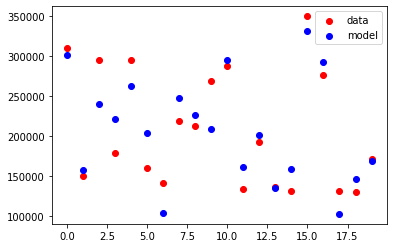

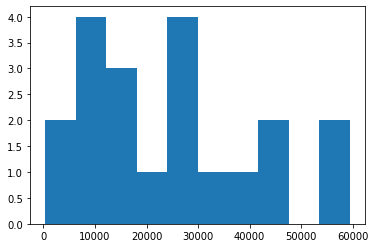

In [86]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
### MSE : erreure quadratique {1/n Sum(yvrai-ypredit)²}
### MAE : erreure absolue moyenne {1/n Sum|yvrai-ypredit|} ,MSE!=(MAE)²
## RMSE : sqrt(MSE) , ca permet de remettre a l'echelle la MSE 
## R² : coefficient de detrmination 1-(MSE/variance)

##Pretraitement de donnees##
ventes=pd.read_excel("VENTES.xlsx")
ventes.head()
ventes.describe()
ventes.shape
ventes.dropna(axis=0,inplace=True)
ventes["ville"].replace(['LILLE','LAMBERSART'],[0,1],inplace=True)

##modele##
x=ventes[["ville","annee_cons","nbr_piece","etage","surface"]]
y=ventes["prix"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=5)
model=LinearRegression()
model.fit(xtrain,ytrain)
ypredict=model.predict(xtrain)
model.score(xtest,ytest)

##coefficient 
print(model.coef_) ## coefficient w1......Wi
print(model.intercept_) ## coefficient w0

##erreure 
print("MAE",mean_absolute_error(ytrain,ypredict))
print("MSE",mean_squared_error(ytrain,ypredict))
print("RMSE",np.sqrt(mean_squared_error(ytrain,ypredict)))
print("Mediane",median_absolute_error(ytrain,ypredict)) #tres peu sensible aux grandes erreures
print("R2",r2_score(ytrain,ypredict)) 

##cross_validation
print("cross_val_score",cross_val_score(LinearRegression(),xtrain,ytrain,cv=5))
print("")
param_grid={"normalize":[True,False],
            "n_jobs":np.arange(1,50),
            "fit_intercept":[True,False]}
grid=GridSearchCV(LinearRegression(),param_grid,cv=5)
grid.fit(xtrain,ytrain)
print("Meilleure Score",grid.best_score_)
print("Meilleur parametres",grid.best_params_)

##visualisation 
fig1=plt.figure()
x1=np.arange(0,ytrain.shape[0])
plt.scatter(x1,ytrain,c='r',label='data')
plt.scatter(x1,ypredict,c='b',label='model')
plt.legend()


fig2=plt.figure()
error=np.abs(ytrain-ypredict) ##affichage l'evolution d'erreure par histogramme
plt.hist(error,bins=10)


